# CI 460 Project - Generative Adversarial Networks
Jake Landers
---



## Abstract

My research project was done on Generative Adversarial Networks, also known as GANs.  A GAN is a neural network that is trained on a large dataset of real data so that it can learn how to generate data that looks real and differentiate between real data and fake data.  For my project, I attempted to develop a GAN that focused on generating images of cats.  A GAN that focuses on generating a specific piece of data such as an image of a cat is knows as a Conditional GAN.  I used the CIFAR-10 dataset provided by Keras that consists of 10 different classes of images and each class had 5,000 training images and 1,000 test images for a total of 60,000 training images.  One of the ten classes of images were cat images, so the training set has 5,000 examples of what a cat looks like, and 45,000 examples of what a cat does not look like.  The results of my Conditional GAN were far from perfect, as some of the images it generated were unrecognizeable but I was relieved to see that some of the images it generated did look somewhat real.  



---



## Introduction

Generative Adversarial Networks, or GANs for short, is a fascinating research area in the field of Machine Learning.  GAN's are used to generate data, most commonly images, that are not real but appear to be real.  A GAN works by developing three models: A generator, discriminator, and a model that consists of both of these models combined which is called the GAN model.  It works by training the discriminator and generator on a large dataset of real data, which will teach the generator what real data looks like so it can create data that looks like real data, and the discriminator learns to recognize what real data looks like so it knows when it is being fed fake data from the generator.  When you are training the GAN, what you are actually doing is having the generator and discriminator train each other.  The generator will do its best to generate data that resembles real data and pass it to the discriminator, the discriminator will determine whether the data is real or fake, and the two will compare results and whoever was wrong will get their weights updated.

---




## Problem Definition
I want to develop a generator that creates images that look real and I want my discriminator to be good at determining what is a real image and what is a fake image.  The end goal is to train a discriminator that is good at determining what is real and what is fake, but develop a generator that can fool the discriminator most of the time.  I'll know I have a good generator if it can fool an effective discriminator.  
#1. Find a dataset
* Found a dataset of 10 different images, imported directly from Keras.








#2. Build a model around the shape of that dataset


#3. Build a discriminator
* The discriminator had to be built using a functional model rather than a sequential model.  A functional model is a model that allows you to decide how the layers are connected.




#4. Build a generator
* The generator also required the functional model rather than the sequential model.


#5. Link discriminator and generator to form the GAN model

##6. Train the models
Here is how the training works:
1. Real samples are pulled from the dataset and passed to the discriminator so it can learn what real images look like.
2. The generator creates fake images and passes them to the discriminator.
3. Now that the discriminator has seen fake images and real images, pass a fake image to the GAN model but tell the GAN model that it was a real image and see how the discriminator performs.  If the discriminator guesses correct, the generator's weights are updated.  If the discriminator guess incorrectly, it's own weights will be updated.
4. Update hyperparameters to improve results


## Data Exploration/Technical Approach
Technical Approach:
#1. Import dataset
I used the CIFAR-10 dataset from Keras for this project.  This dataset consists of 10 categories of images:
* Airplanes
* Automobiles
* Birds
* Cats
* Deer
* Dogs
* Frogs
* Horses
* Ships
* Trucks

Importing my dataset into my project was easy, all I had to do in a code cell was run "from keras.datasets.cifar10 import load_data"

#2. Build my models based on the shape of the dataset:
* The shape of the training set of the data was as follows:







In [ ]:
from keras.datasets.cifar10 import load_data
(train_x, train_y), (test_x, test_y) = load_data()
print("The shape of the training data is: ",train_x.shape)
print("The training data has", train_x.ndim, "dimensions.")
print("The shape of the matrix of labels is:", train_y.shape)

The shape of the training data is:  (50000, 32, 32, 3)
The training data has 4 dimensions.
The shape of the matrix of labels is: (50000, 1)



The shape of the training data is:  (50000, 32, 32, 3)
The training data has 4 dimensions.
The shape of the matrix of labels is: (50000, 1)

There are:
* 50,000 elements
* Each element consists of 32 matrices
* Each matrix has 32 columns
* Each matrix has 3 rows
* My models do not need to know that there are 50,000 elements, but they do need to know the exact shape of those elements.  I had to build my discriminator to take data of shape(32, 32, 3), and I had to build my generator so it outputs that same shape.  
* The dataset conveniently comes with a matrix of labels that correspond to each image.  There are 50,000 training images, and there are 50,000 elements in the labels matrix and each element is a number between 0 and 9.  Each index of the label matrix corresponds to the correct index of the 3D array of training images. 

In [ ]:
for i in range(1, 10):
  print(train_y[i])

[9]
[9]
[4]
[1]
[1]
[2]
[7]
[8]
[3]


#3. Build Discriminator
* The discriminator model was created using a functional model.  A functional model is convenient because you can attach layers however you want, and you can combine the outputs of multiple layers into one.  Here is a flowchart, followed by a description of how I built the discriminator:


In [ ]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving Discriminator Flowchart.png to Discriminator Flowchart (1).png


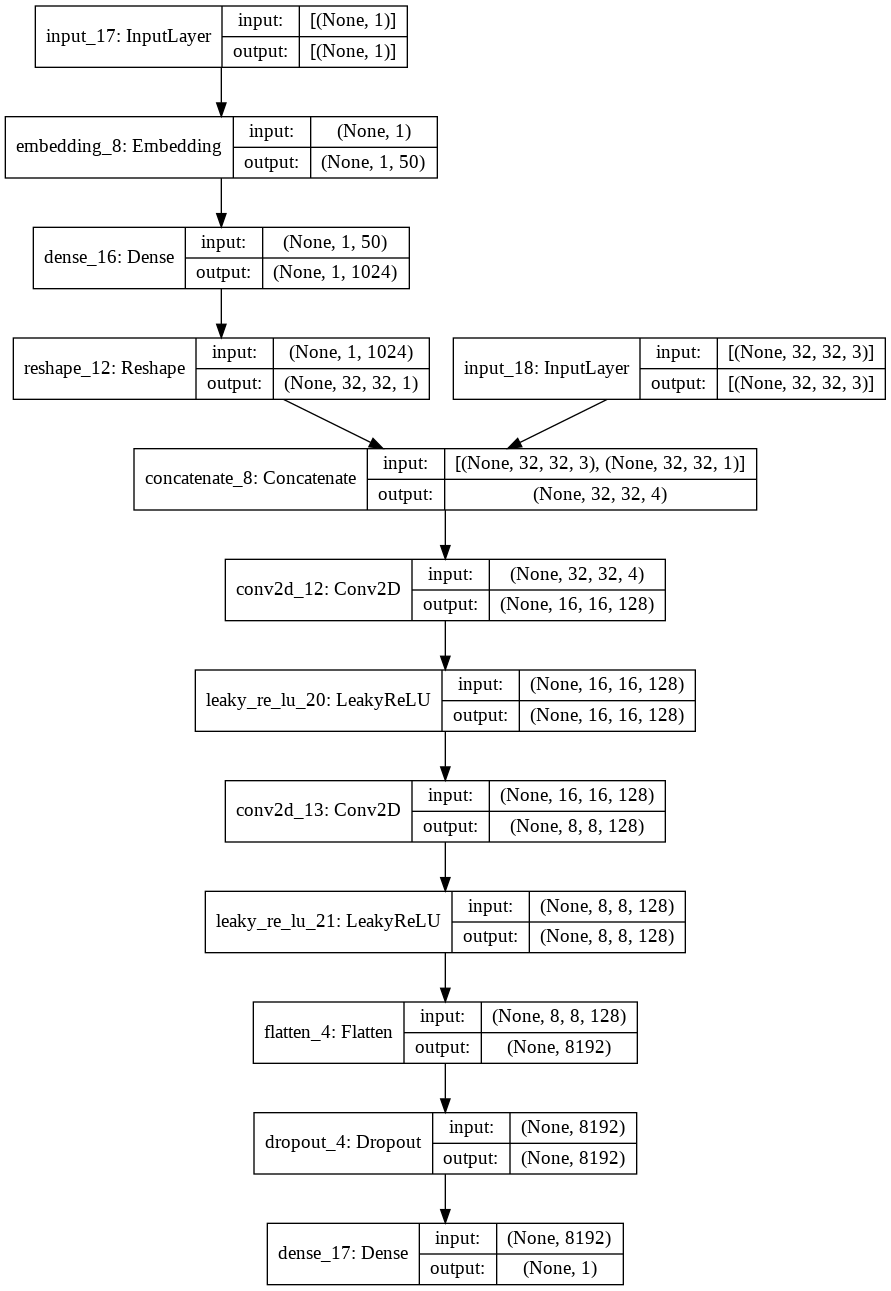

In [ ]:
Image('Discriminator Flowchart.png', width=500)

1. I created two input layers, one takes a label as input and the other takes an image (matrix) of shape (32,32,3)
2. The first input layer that takes a label gets output into an embedding layer that creates a unique 50-element vector for that label.  
3. That label paired with its 50 element vector gets passed into a dense layer that has 32 * 32 output nodes.  I used 32 * 32 nodes because that is similar to the shape of my dataset.
4. The data is reshaped from the Dense layer into a shape that resembles an image, then it is combined with the output of the second input layer, which is either a real or fake image.
5. The data is processed with a number of Conv2D and LeakyReLu layers, and is then flattened into a Dense layer which is also the output layer.

In [ ]:
def build_discriminator(input_shape=(32,32,3), num_of_classes=10):
  # Input layer for functional model
  input_1 = Input(shape=(1,))
  # 50 element vector that gets paired with label from input layer
  embedding_1 = Embedding(num_of_classes, 50)(input_1)
  num_of_nodes = input_shape[0]**2 #28 * 28
  dense_1 = Dense(num_of_nodes)(embedding_1)
  reshape_1 = Reshape((input_shape[0], input_shape[1], 1))(dense_1)
  # Input layer for real and fake images
  input_2 = Input(shape=input_shape)
  merge = Concatenate()([input_2, reshape_1])
  conv2d_1 = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
  leaky_relu_1 = LeakyReLU(alpha=0.2)(conv2d_1)
  conv2d_2 = Conv2D(128, (3,3), strides=(2,2), padding='same')(leaky_relu_1)
  leaky_relu_2 = LeakyReLU(alpha=0.2)(conv2d_2)
  # Flatten data to be fed into Dense layer
  flatten_1 = Flatten()(leaky_relu_2)
  dropout_1 = Dropout(0.4)(flatten_1)
  output_layer = Dense(1, activation='sigmoid')(dropout_1)
  model = Model([input_2, input_1], output_layer)
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  print("Discriminator Model")
  model.summary()
  plot_model(model, to_file='Discriminator_Flowchart.png', show_shapes=True, show_layer_names=True)
  return model
build_discriminator()

Discriminator Model
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 50)        500         input_5[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 1, 1024)      52224       embedding_2[0][0]                
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 32, 32, 3)]  0                                            
________________________________________________________________________

#3. Build a generator:
* The generator, like the discriminator, was also built using a functional model:

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving Generator Flowchart.png to Generator Flowchart.png


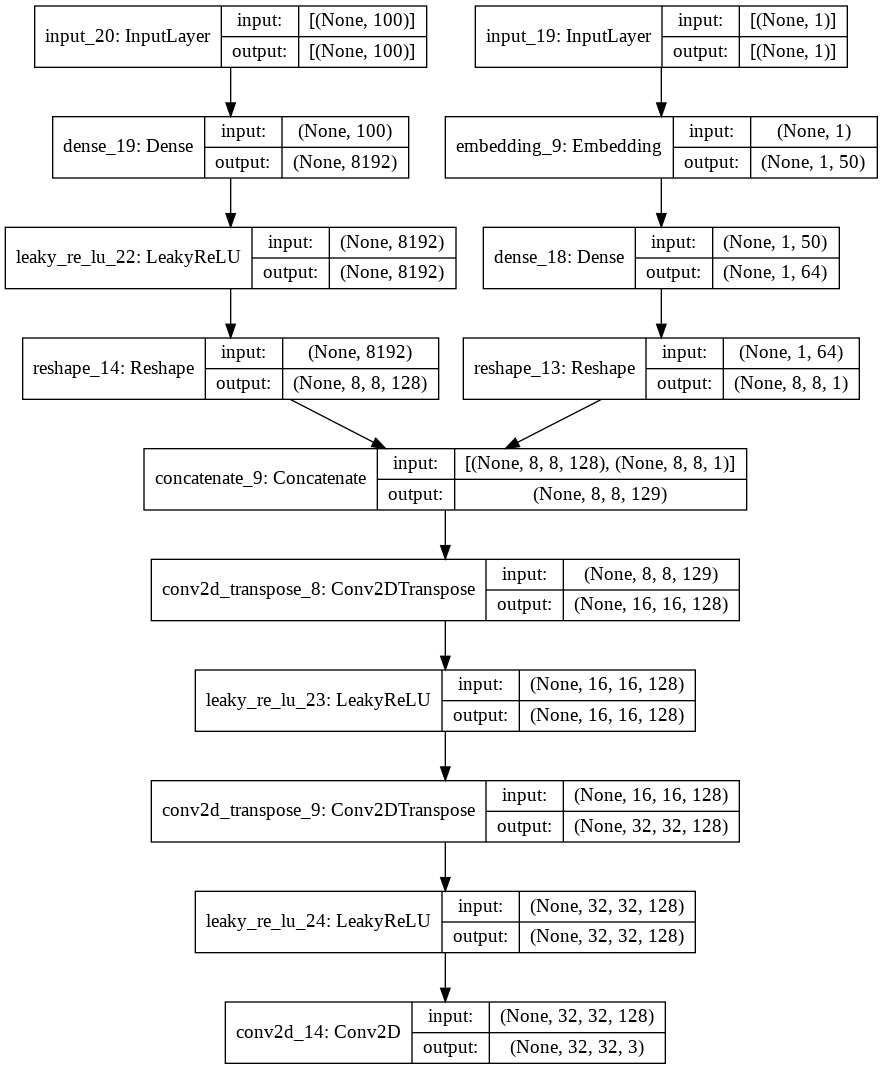

In [ ]:
Image('Generator Flowchart.png', width=500)

1. I created two input layers.  One takes randomly generated data that the generator will use to generate an image, and the other takes a label that is then passed to an Embedding layer that will create a unique 50 element vector that corresponds to that label.
2. The randomly generated data from the first input layer is passed through a Dense and then a Leaky ReLU layer, then it is reshaped so that its shape matches the output of the second input layer.
3. The two outputs are then combined and used as input to a Conv2DTranspose layer.
4. After that, the model becomes sequential and the data is processed by the remaining layers until it is output by the Conv2D layer and is output into a shape of (32, 32, 3).  The data coming from the generator must be output into this exact shape because this data gets passed to the discriminator, and this is the shape that the discriminator is expecting.

In [ ]:
def build_generator(random_latent_points, num_of_classes=10):
  # Define input layer for functional model
  input_1 = Input(shape=(1,))
  # Link unique 50 element vector to each label
  embedding_1 = Embedding(num_of_classes, 50)(input_1)
  num_of_nodes = 8 * 8
  dense_1 = Dense(num_of_nodes)(embedding_1)
  # Reshape data from 1D to 2D
  reshape_1 = Reshape((8, 8, 1))(dense_1)
  # Random latent point for image generator
  input_2 = Input(shape=(random_latent_points,))
  # For 128 8 by 8 images
  num_of_nodes = 128 * 8 * 8
  dense_2 = Dense(num_of_nodes)(input_2)
  leaky_relu_1 = LeakyReLU(alpha=0.2)(dense_2)
  # For 128 8 by 8 images
  reshape_2 = Reshape((8, 8, 128))(leaky_relu_1)
  # Give generated image a label
  merge = Concatenate()([reshape_2, reshape_1])
  # Upsample and Conv2D operation
  conv2dtranspose_1 = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
  leaky_relu_2 = LeakyReLU(alpha=0.2)(conv2dtranspose_1)
  # UpSample and Conv2D operation
  conv2dtranspose_2 = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(leaky_relu_2)
  leaky_relu_3 = LeakyReLU(alpha=0.2)(conv2dtranspose_2)
  output_layer = Conv2D(3, (7,7), activation='tanh', padding='same')(leaky_relu_3)
  print("Generator Model")
  model = Model([input_2, input_1], output_layer)
  model.summary()
  plot_model(model, to_file='Generator_Flowchart.png', show_shapes=True, show_layer_names=True)
  return model

#4. Link discriminator and generator to form the GAN model:
* Connecting the two models to form the GAN model was simple.  The discriminator and generator models were built within functions and the models were returned using return statements at the end of the function.  Because the models were returned from the functions, I was able to set the function call equal to a variable which causes the model to be returned into that variable.  Then I created another function called build_gan() that takes the two variables that contain the models as arguments, and from there I was able to combine the two into one model:

In [ ]:
def build_gan(gen_model, disc_model):
  # Weights in discriminator should be untrainable from here
  disc_model.trainable = False
  # Get noise data and labels from generator
  gen_noise, gen_label = gen_model.input
  # Get an image from the generator
  gen_output = gen_model.output
  # Give generated image and label for generated image to discriminator
  gan_output = disc_model([gen_output, gen_label]) # Pass image and label for image from generator to discriminator
  model = Model([gen_noise, gen_label], gan_output)
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

disc_model = build_discriminator()
gen_model = build_generator(random_latent_points)
gan_model = build_gan(gen_model, disc_model)

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving GAN_Flowchart.png to GAN_Flowchart (1).png


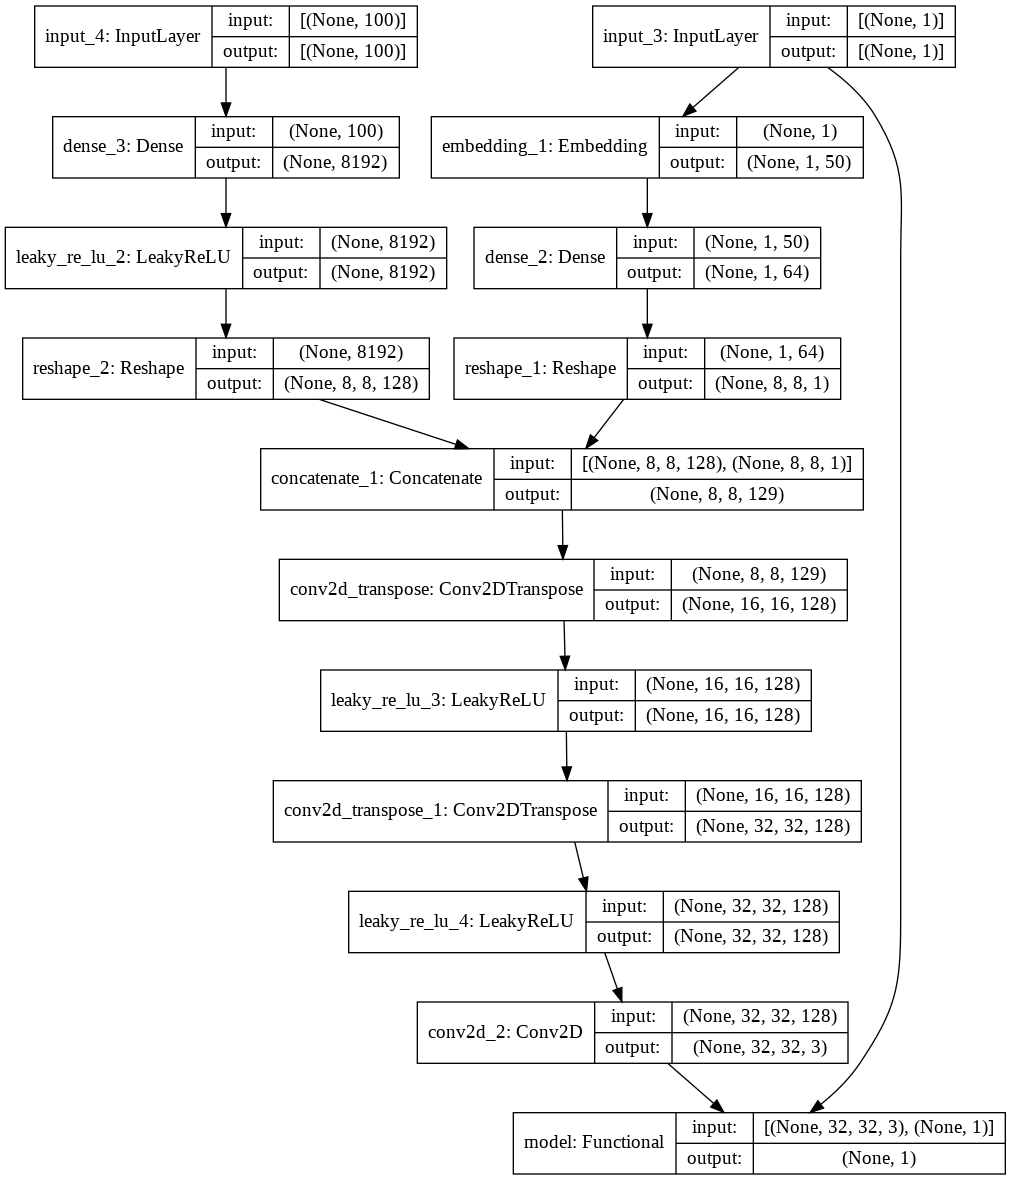

In [ ]:
Image('GAN_Flowchart.png', width=500)

#5. Change elements in dataset from values between [0-255] to values between [-1, 1]
* This doesn't actually change the data itself, but what it does is make the data more compatible with my activation and loss functions.


In [ ]:
def load_dataset():
  #train_x is dataset, train_y holds labels for 10 categories (values [0-9])
  (train_x, train_y), (test_x, test_y) = load_data()
  # Scale matrix to values between 1 and -1
  train_x = (train_x.astype('float32') - 127.5) / 127.5
  # Do not convert values of train_y, those are the labels and they must stay the way they are
  return [train_x, train_y]

#6. Generate random data for the generator.  
* The generator cannot generate images out of thin air, it has to be given data that it can use to shape into what it thinks is an image.  I generated a 100 * 28 element Gaussian distributed random vector, reshaped it into a matrix, generated labels for the matrix, and passed them to the return statement of the generate_latent_points function.  Those variables will be sent to the generate_fake_samples function, which sends the data to the generator model and the generator model will send back 64 predictions of what an image looks like. 


In [ ]:
from numpy.random import randn
from numpy.random import randint

def generate_fake_samples(generator, random_latent_points, num_of_samples):
  # Generate random latent space vector from generate_latent_points function
  # reshaped_random_point will have 128 elements, each element will have 100-element Gaussian distributed vector
  reshaped_random_point, labels = generate_latent_points(random_latent_points, num_of_samples)
  # Use data returned from generate_latent_points function to make a prediction about what an image looks like
  # Returns data that is the same shape of the dataset: (32, 32, 3)
  images = generator.predict([reshaped_random_point, labels])

  # Array of zeros to represent fake image
  zero_array = zeros((num_of_samples, 1))
  print(images.shape)
  return [images, labels], zero_array

def generate_latent_points(random_latent_points, num_of_samples, num_of_classes=10):
  # Create 12800 element vector of random points using Gaussian distribution
  random_point = randn(random_latent_points * num_of_samples)
  print("Length of random_point variable: ",len(random_point))
  # Reshape random_point into array of 128 elements, each element has a 100 element vector
  reshape_random_point = random_point.reshape(num_of_samples, random_latent_points)
  # Each of 128 elements gets its own label which is a number between [0-9]
  labels = randint(0, num_of_classes, num_of_samples)
  print("Length of labels variable: ",len(labels))
  print("Length of reshape_random_point variable: ",len(reshape_random_point))
  # Here is 1 of 128 100 element Gaussian vectors 
  print(reshape_random_point[0])
  print(reshape_random_point.shape)
  # return [reshape_random_point, labels]

# Random point vector for generator
random_latent_points = 100
generate_latent_points(random_latent_points, 128)

Length of random_point variable:  12800
Length of labels variable:  128
Length of reshape_random_point variable:  128
[-0.85107127 -0.81236113  1.63220718  0.60105008 -1.09334931 -0.13184784
  1.05121388  0.40047398 -0.30074723  0.35209424  0.654085   -0.04260682
  0.6696957  -1.6347341  -0.89036944 -2.59748303  0.34918614 -1.08787573
  1.10515642  1.267002   -0.11311912  1.81596109 -0.64161513  1.57949576
 -1.62621165  0.27079925  2.17543372 -0.17546371  0.46501779  0.96930863
 -0.99578132  0.81660706 -0.3593689  -0.36040273  0.48469762 -1.42990009
  2.08986812  0.89745415 -1.58546636 -0.48214657 -0.53276714 -0.93178458
 -0.54261954  1.69236252  0.24748741 -0.98919692  1.58390634  1.30353787
  0.62494966 -0.07807784  0.42872798 -0.62603996  0.57816494 -0.62366534
 -0.50417059 -0.01131649  1.08716183 -0.1145809   0.73517423 -0.40176699
  2.02877533  1.02735169  0.71438656 -1.9481582   0.00506288 -2.22500195
 -0.05568092 -0.64973966  1.61895895 -0.54137688 -1.75892411 -0.01929227
  0.24

#7. Train the models:
Here is how the training works:
1. Real samples are pulled from the dataset and passed to the discriminator so it can learn what real images look like.
2. The generator creates fake images and passes them to the discriminator.
3. Now that the discriminator has seen fake images and real images, pass a fake image to the GAN model but tell the GAN model that it was a real image and see how the discriminator performs.  If the discriminator guesses correct, the generator's weights are updated.  If the discriminator guess incorrectly, it's own weights will be updated.



---


## Training and Testing


### Observations during Training and Testing Phases
1. Training takes a lot of time.  Running this model for 100 epochs takes roughly 1.5 hours.  This makes improving training results difficult because it takes so much time to determine if the changes I made to my model improved my results or not.
2. Not all of the images look good.  Some images look like random noise, and others somewhat take the shape of something that looks real.
3. Changing the size of the Gaussian distributed random point vector as well as changing the number of epochs seem to be the only things that change the results.



---


## Performance Evaluation


### Observations after Performance Evaluation
* The generator created images that looked like the images from the dataset (cats, dogs, horses, etc.), but the quality was bad.  The images were pixelated or distorted, but the quality was just good enough to where I could tell what the image was that it was trying to create.  
* The values for loss from each model seemed to be stuck between 0.68 and 0.74.


#Challenges and Shortcomings
1. Understanding how to use a functional model instead of a sequential model and why you want to do so for a GAN was difficult to understand, but this is a challenge I overcame with time and effort and now I understand it quite well.
2. Telling the generator of the Conditional GAN to only generate cat images was both a challenge and a shortcoming.  I tried to tell the generator to focus on generating one type of image by only passing it one specific label, but it never seemed to focus on generating one type of image.  
3. I had a difficult time increasing the size of the images so they could be seen better.  After a considerable amount of troubleshooting, I discovered that the images from the CIFAR-10 dataset are by default small images.  I included a sample of generated images below to show that I did develop a generator that works, but you have to look closely to see the details of the images.  Some of the images do resemble something real, but others look like random noise:
4. The biggest shortcoming was that the loss for the models was high, and at this time I don't know to fix it.  I tried tuning the hyperparameters, but it did not make a significant improvement.  

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving Generated Image.png to Generated Image.png


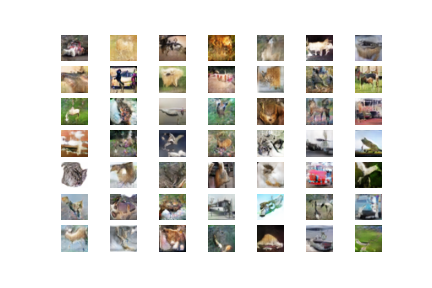

In [ ]:
Image("Generated Image.png", width=600)



---


## Conclusion and Next Steps
GANs are a simple, yet complex field of Machine Learning.  How a GAN works can be explained simply: You have one model that tries to generate data that appears real and that model passes the generated data to another model that tries to determine if the data is real or fake.  If you put it that way, a GAN is simple.  When you start getting into the details of how it works, that is when it gets complicated.  The results were not as good as I hoped they would be, but I now understand that generating images that look completely real is a difficult task, and very few have done it successfully.

Next Steps:
I will continue to work on this project because I find GAN's fascinating and I would love to figure out how to make my model better.  Here are a few ideas I have to improve my results:
1. Try data augmentation so the discriminator has more samples to train itself with
2. Play with the number of samples the generator creates or that the discriminator receives to see if results change
3. This idea may sound ambitious, but I have thought about developing a Convolutional Neural Network that the generator can pass images to once the generator has been trained so the CNN can extract features from the images to improve image quality.  If this works, then perhaps the CNN can be incorporated into the training phase of the GAN model.

## Acknowledgements and Resources

Bias Vector:
https://deepai.org/machine-learning-glossary-and-terms/bias-vector

Template for GAN:
https://www.tensorflow.org/tutorials/generative/dcgan

Batch Normalization:
https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/

Upsampling and Transpose:
https://machinelearningmastery.com/upsampling-and-transpose-convolution-layers-for-generative-adversarial-networks/

Padding:
https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/

Conv2D Parameters:
https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

predict() method in generate_random_number_for_vector function
https://www.askpython.com/python/examples/python-predict-function

randn() - Used for matrix operations, from numpy, returns matrix of random values from Gaus. distribution mean 0 and variance 1
https://www.geeksforgeeks.org/numpy-matrix-operations-randn-function/

train_on_batch()
https://stackoverflow.com/questions/49100556/what-is-the-use-of-train-on-batch-in-keras

Embedding Layers:
https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture

Functional API:
https://machinelearningmastery.com/keras-functional-api-deep-learning/

Book: Machine Learning with Python
-Francois Chollet

Book: Generative Adversarial Networks with Python:
-Jason Brownlee







In [ ]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate
from keras.layers import UpSampling2D
from keras.layers import ZeroPadding2D
from keras.utils.vis_utils import plot_model

# Discriminator
def build_discriminator(in_shape=(32,32,3), n_classes=10):
  # Input layer for functional model
  input_1 = Input(shape=(1,))
  # Unique 50 element vector for each 10 class labels
  embedding_1 = Embedding(n_classes, 50)(input_1)
  num_of_nodes = in_shape[0]**2 #28 * 28
  dense_1 = Dense(num_of_nodes)(embedding_1)
  reshape_1 = Reshape((in_shape[0], in_shape[1], 1))(dense_1)
  # Input layer for real and fake images
  input_2 = Input(shape=in_shape)
  merge = Concatenate()([input_2, reshape_1])
  conv2d_1 = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
  leaky_relu_1 = LeakyReLU(alpha=0.2)(conv2d_1)
  conv2d_2 = Conv2D(128, (3,3), strides=(2,2), padding='same')(leaky_relu_1)
  leaky_relu_2 = LeakyReLU(alpha=0.2)(conv2d_2)
  # Flatten data to be fed into Dense layer
  flatten_1 = Flatten()(leaky_relu_2)
  dropout_1 = Dropout(0.4)(flatten_1)
  output_layer = Dense(1, activation='sigmoid')(dropout_1)
  model = Model([input_2, input_1], output_layer)
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  print("Discriminator Model")
  model.summary()
  plot_model(model, to_file='Discriminator_Flowchart.png', show_shapes=True, show_layer_names=True)
  return model

# Generator
def build_generator(random_latent_points, num_of_classes=10):
  # Define input layer for functional model
  input_1 = Input(shape=(1,))
  # Link unique 50 element vector to each label
  embedding_1 = Embedding(num_of_classes, 50)(input_1)
  num_of_nodes = 8 * 8
  dense_1 = Dense(num_of_nodes)(embedding_1)
  # Reshape data from 1D to 2D
  reshape_1 = Reshape((8, 8, 1))(dense_1)
  # Random latent point for image generator
  input_2 = Input(shape=(random_latent_points,))
  # For 128 8 by 8 images
  num_of_nodes = 128 * 8 * 8
  dense_2 = Dense(num_of_nodes)(input_2)
  leaky_relu_1 = LeakyReLU(alpha=0.2)(dense_2)
  # For 128 8 by 8 images
  reshape_2 = Reshape((8, 8, 128))(leaky_relu_1)
  # Give generated image a label
  merge = Concatenate()([reshape_2, reshape_1])
  # Upsample and Conv2D operation
  conv2dtranspose_1 = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
  leaky_relu_2 = LeakyReLU(alpha=0.2)(conv2dtranspose_1)
  # UpSample and Conv2D operation
  conv2dtranspose_2 = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(leaky_relu_2)
  leaky_relu_3 = LeakyReLU(alpha=0.2)(conv2dtranspose_2)
  output_layer = Conv2D(3, (7,7), activation='tanh', padding='same')(leaky_relu_3)
  print("Generator Model")
  model = Model([input_2, input_1], output_layer)
  model.summary()
  plot_model(model, to_file='Generator_Flowchart.png', show_shapes=True, show_layer_names=True)
  return model

def build_gan(gen_model, disc_model):
  # Weights in discriminator should be untrainable from here
  disc_model.trainable = False
  # Get noise data and labels from generator
  gen_noise, gen_label = gen_model.input
  # Get an image from the generator
  gen_output = gen_model.output
  print("This is the output shape of the generator: ",gen_output.shape)
  # Give generated image and label for generated image to discriminator
  gan_output = disc_model([gen_output, gen_label]) # Pass image and label for image from generator to discriminator
  model = Model([gen_noise, gen_label], gan_output)
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  model.summary()
  plot_model(model, to_file='GAN_Flowchart.png', show_shapes=True, show_layer_names=True)
  return model

def load_dataset():
  #train_x is dataset, train_y holds labels for 10 categories (values [0-9])
  (train_x, train_y), (test_x, test_y) = load_data()
  # Scale matrix to values between 1 and -1
  train_x = (train_x.astype('float32') - 127.5) / 127.5
  return [train_x, train_y]

def train_gan(gen_model, disc_model, gan_model, dataset, random_latent_points):
  epochs = 300
  batches = 128
  batches_per_epoch = int(dataset[0].shape[0] / batches)
  half_batch = int(batches / 2)
  for i in range(epochs):
    for j in range(batches_per_epoch):
      # Get random real images
      [real_images, real_image_labels], array_of_ones = generate_real_samples(dataset, half_batch)
      # Update weights in discriminator
      disc_loss1, _ = disc_model.train_on_batch([real_images, real_image_labels], array_of_ones)
      # Get fake images from generator
      [fake_images, fake_image_labels], array_of_zeros = generate_fake_samples(gen_model, random_latent_points, half_batch)
      # Update discriminator weights again (Maybe update weights a third time?)
      disc_loss2, _ = disc_model.train_on_batch([fake_images, fake_image_labels], array_of_zeros)
      # Get random latent space point for generator
      # random_points = 128 by 100 matrix, labels_input = 100 dimensional vector of [0-9] labels
      [random_points, labels_input] = generate_latent_points(random_latent_points, batches)
      # Invert the label for the fake samples
      invert_labels_fake_samples = ones((batches, 1))
      # Switch fake image labels so GAN knows they were false so it can update its loss
      # random_points is 128 * 100 matrix of Gaussian distributed points
      # labels_input 128 dimension vector of labels [0-9]
      gan_loss = gan_model.train_on_batch([random_points, labels_input], invert_labels_fake_samples)
      # Summary
      print('>%d, %d/%d, disc_loss1=%.3f, disc_loss2=%.3f gan_loss=%.3f' %
        (i+1, j+1, batches_per_epoch, disc_loss1, disc_loss2, gan_loss))

    gen_model.save('Generator.h5')

def generate_real_samples(dataset, num_of_samples):
  # Split dataset into images and labels
  images, labels = dataset
  # Fill an array that is num_of_samples long, each element will be used to index an image from the dataset
  random_image_array = randint(0, images.shape[0], num_of_samples)
  # Get images and labels
  real_image, real_image_label = images[random_image_array], labels[random_image_array]
  # Array of ones to represent real image
  array_of_ones = ones((num_of_samples, 1))
  return [real_image, real_image_label], array_of_ones

def generate_fake_samples(generator, random_latent_points, num_of_samples):
  # Generate random latent space vector from generate_latent_points function
  reshaped_random_point, labels = generate_latent_points(random_latent_points, num_of_samples)
  # Make predictions
  images = generator.predict([reshaped_random_point, labels])
  # Array of zeros to represent fake image
  zero_array = zeros((num_of_samples, 1))
  print("This is images.shape from generate_fake_samples: ",images.shape)
  return [images, labels], zero_array

def generate_latent_points(random_latent_points, num_of_samples, num_of_classes=10):
  # Create vector of random points using Gaussian distribution
  random_point = randn(random_latent_points * num_of_samples)
  # Reshape latent points into matrix 128 * 100
  reshape_random_point = random_point.reshape(num_of_samples, random_latent_points)
  # Each of 128 columns gets a label of one value between [0-9]
  labels = randint(0, num_of_classes, num_of_samples)
  return [reshape_random_point, labels]

# Random point vector for generator
random_latent_points = 200 #Changed this from 100

disc_model = build_discriminator()
gen_model = build_generator(random_latent_points)
gan_model = build_gan(gen_model, disc_model)
dataset = load_dataset()
train_gan(gen_model, disc_model, gan_model, dataset, random_latent_points)